In [50]:
# Import the necessary libraries
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt

## Dataset Description

**Dataset name and source:**
- Name: solar-power-generation-data
- Source: anikanna from kagglehub



In [51]:
# Download Dataset
# Use kagglehub to download the latest version of the solar power Generation dataset.

# Download latest version
path = kagglehub.dataset_download("anikannal/solar-power-generation-data")

# Print the path to dataset files
print("Path to dataset files:", path)

Path to dataset files: C:\Users\felbe\.cache\kagglehub\datasets\anikannal\solar-power-generation-data\versions\1


In [52]:
# Load the first dataset into a pandas DataFrame
file_path1 = os.path.join(path, "Plant_1_Generation_Data.csv")
generation = pd.read_csv(file_path1)

# Load the second dataset into a pandas DataFrame
file_path2 = os.path.join(path, "Plant_1_Weather_Sensor_Data.csv")
weather = pd.read_csv(file_path2)

# Explore Dataset

# Display the first few rows of the DataFrame
generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [53]:
weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [54]:
# Convert DATE_TIME for combining datasets later

# Convert DATE_TIME columns to datetime format
generation['DATE_TIME'] = pd.to_datetime(generation['DATE_TIME'], format='%d-%m-%Y %H:%M', dayfirst=True)
weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# convert each unique iverter source_key to a column for DC_POWER, AC_POWER, DAILY_YIELD, and TOTAL_YIELD
generation_dc_power = pd.pivot_table(generation, index='DATE_TIME', columns='SOURCE_KEY', values='DC_POWER').reset_index()
generation_ac_power = pd.pivot_table(generation, index='DATE_TIME', columns='SOURCE_KEY', values='AC_POWER').reset_index()
generation_daily_yield = pd.pivot_table(generation, index='DATE_TIME', columns='SOURCE_KEY', values='DAILY_YIELD').reset_index()
generation_total_yield = pd.pivot_table(generation, index='DATE_TIME', columns='SOURCE_KEY', values='TOTAL_YIELD').reset_index()

# Merge the datasets sequentially with unique suffixes
df = pd.merge(generation_dc_power, generation_ac_power, on='DATE_TIME', suffixes=('_dc', '_ac'))
df = pd.merge(df, generation_daily_yield, on='DATE_TIME', suffixes=('', '_daily'))
df = pd.merge(df, generation_total_yield, on='DATE_TIME', suffixes=('', '_total'))
df = pd.merge(df, weather, on='DATE_TIME')

In [55]:
# Check for missing data in the pivot tables
print("Missing data in generation_dc_power:")
print(df.isnull().sum())


# Calculate the continuous missing data periods for each pivot table
def calculate_missing_periods(df_pivot):
    df_pivot.set_index('DATE_TIME', inplace=True)
    missing_periods = {}
    for column in df_pivot.columns:
        missing_data = df_pivot[column].isnull()
        missing_streaks = (missing_data != missing_data.shift()).cumsum()
        missing_periods[column] = missing_streaks[missing_data].value_counts().max()
    return missing_periods

missing_periods_generation_data = calculate_missing_periods(df)


print("Continuous missing data periods in Generation data:")
print(missing_periods_generation_data)





Missing data in generation_dc_power:
DATE_TIME               0
1BY6WEcLGh8j5v7_dc      3
1IF53ai7Xc0U56Y_dc     39
3PZuoBAID5Wc2HD_dc     39
7JYdWkrLSPkdwr4_dc     24
                       ..
PLANT_ID                0
SOURCE_KEY              0
AMBIENT_TEMPERATURE     0
MODULE_TEMPERATURE      0
IRRADIATION             0
Length: 94, dtype: int64
Continuous missing data periods in Generation data:
{'1BY6WEcLGh8j5v7_dc': np.int64(2), '1IF53ai7Xc0U56Y_dc': np.int64(14), '3PZuoBAID5Wc2HD_dc': np.int64(14), '7JYdWkrLSPkdwr4_dc': np.int64(9), 'McdE0feGgRqW7Ca_dc': np.int64(7), 'VHMLBKoKgIrUVDU_dc': np.int64(9), 'WRmjgnKYAwPKWDb_dc': np.int64(14), 'YxYtjZvoooNbGkE_dc': np.int64(9), 'ZnxXDlPa8U1GXgE_dc': np.int64(9), 'ZoEaEvLYb1n2sOq_dc': np.int64(7), 'adLQvlD726eNBSB_dc': np.int64(14), 'bvBOhCH3iADSZry_dc': np.int64(2), 'iCRJl6heRkivqQ3_dc': np.int64(7), 'ih0vzX44oOqAx2f_dc': np.int64(9), 'pkci93gMrogZuBj_dc': np.int64(7), 'rGa61gmuvPhdLxV_dc': np.int64(7), 'sjndEbLyjtCKgGv_dc': np.int64(7), 

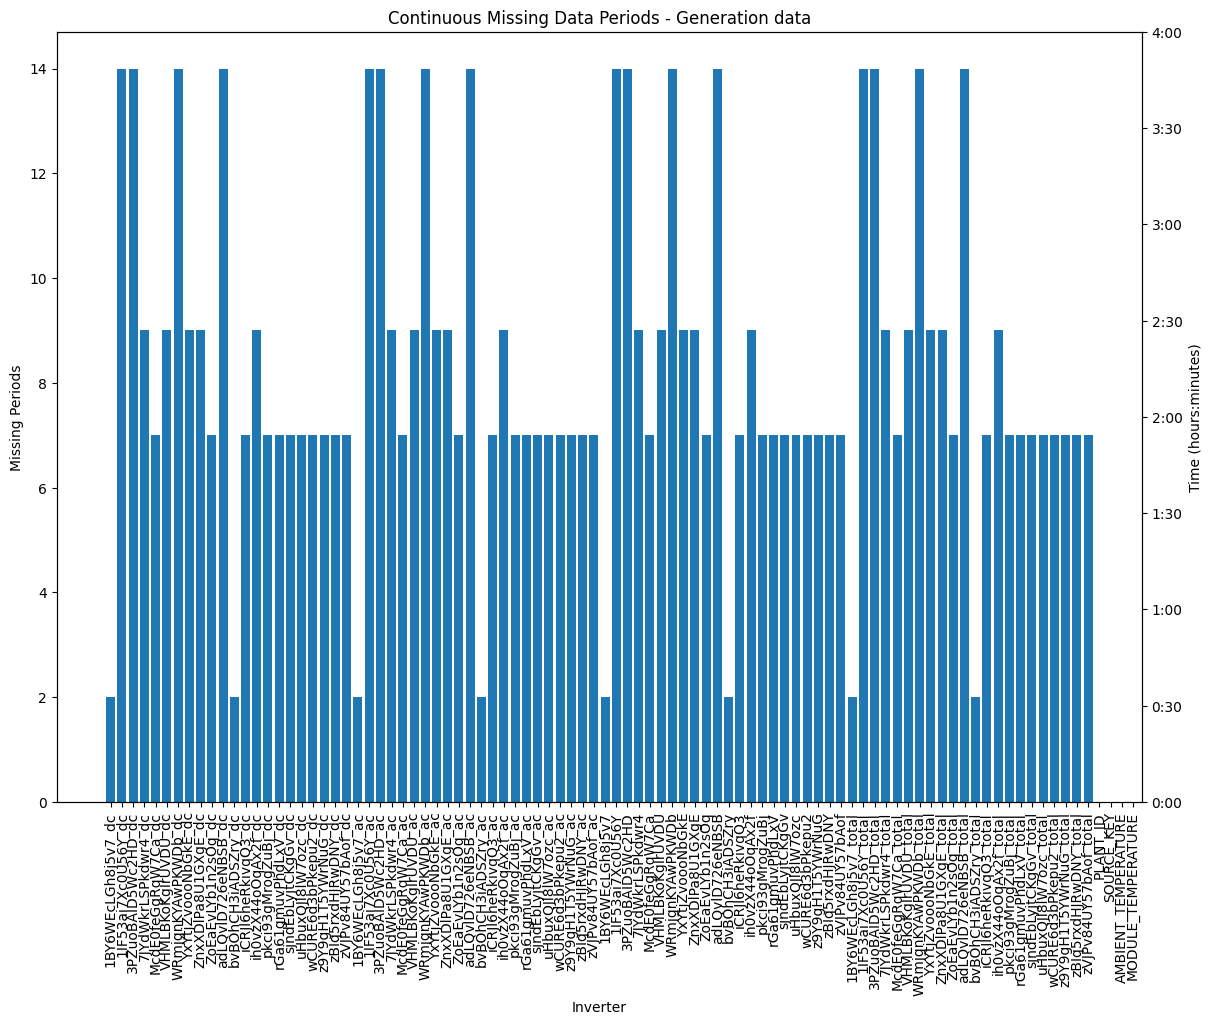

In [56]:
# Plot the continuous missing data periods for Generation data
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

ax.bar(missing_periods_generation_data.keys(), missing_periods_generation_data.values())
ax.set_title('Continuous Missing Data Periods - Generation data')
ax.set_xlabel('Inverter')
ax.set_ylabel('Missing Periods')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.set_ylabel('Time (hours:minutes)')
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels([f"{int(x * 15 // 60)}:{int(x * 15 % 60):02d}" for x in ax.get_yticks()])

plt.show()

In [57]:


# Display the rows to verify the conversion
print(generation['DATE_TIME'])
print(weather['DATE_TIME'])

0       2020-05-15 00:00:00
1       2020-05-15 00:00:00
2       2020-05-15 00:00:00
3       2020-05-15 00:00:00
4       2020-05-15 00:00:00
                ...        
68773   2020-06-17 23:45:00
68774   2020-06-17 23:45:00
68775   2020-06-17 23:45:00
68776   2020-06-17 23:45:00
68777   2020-06-17 23:45:00
Name: DATE_TIME, Length: 68778, dtype: datetime64[ns]
0      2020-05-15 00:00:00
1      2020-05-15 00:15:00
2      2020-05-15 00:30:00
3      2020-05-15 00:45:00
4      2020-05-15 01:00:00
               ...        
3177   2020-06-17 22:45:00
3178   2020-06-17 23:00:00
3179   2020-06-17 23:15:00
3180   2020-06-17 23:30:00
3181   2020-06-17 23:45:00
Name: DATE_TIME, Length: 3182, dtype: datetime64[ns]


In [58]:
# Merge the two datasets and drop unnecessary columns (that are constant)
df = pd.merge(generation, weather, on='DATE_TIME', how='inner')
df.drop(columns=['PLANT_ID_x','PLANT_ID_y', 'SOURCE_KEY_y'], inplace=True)
df.head()


,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


## Time period and sampling frequency:

- **Time Span:** Time between the first and last sample
- **Average Sampling Frequency:** The average time interval between measurements 

In [59]:
# Drop duplicate DATE_TIME values
unique_dates = df['DATE_TIME'].drop_duplicates()

# Sort the DATE_TIME values
unique_dates = unique_dates.sort_values()

# Calculate the time differences between consecutive DATE_TIME values
time_diffs = unique_dates.diff().dropna()

# Compute the average time difference
average_time_diff = time_diffs.mean()

print("Average measure intervall:", average_time_diff)
# Calculate the time between the first and last entry
time_span = unique_dates.iloc[-1] - unique_dates.iloc[0]

print("Time span between first and last entry:", time_span)

Average measure intervall: 0 days 00:15:30.513307984
Time span between first and last entry: 33 days 23:45:00


## Key Variables Analyzed

### For Each Inverter
- **DC_POWER:** The direct current power generated.
- **AC_POWER:** The alternating current power output.
- **DAILY_YIELD:** The cumulative energy generated for the day.
- **TOTAL_YIELD:** The total cumulative energy generated overall.

### For the Plant
- **AMBIENT_TEMPERATURE:** The surrounding environmental temperature at the plant.
- **MODULE_TEMPERATURE:** The temperature of the solar modules.
- **IRRADIATION:** The solar irradiation (sunlight intensity) measured at the plant.

In [60]:
print(f"There are {df['SOURCE_KEY_x'].nunique()} unique inverters")

There are 22 unique inverters


 ## Basic statistical properties:

- **Number of observations:** 



In [61]:
print(f"There are {len(df)} entries in the dataset")

There are 68774 entries in the dataset


- **Missing values:** 

In [62]:
# Check for missing entries in each column
missing_entries = df.isnull().sum()

print("Missing entries in each column:")
print(missing_entries)

Missing entries in each column:
DATE_TIME              0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [63]:
# Check if each unique entry in SOURCE_KEY_x has the same amount of entries
entry_counts = df['SOURCE_KEY_x'].value_counts()

# Check if all counts are the same
all_equal = entry_counts.nunique() == 1

print("All unique entries in SOURCE_KEY_x have the same amount of entries:", all_equal)
if not all_equal:
    print("Entry counts for each SOURCE_KEY_x:")
    print(entry_counts)

All unique entries in SOURCE_KEY_x have the same amount of entries: False
Entry counts for each SOURCE_KEY_x:
SOURCE_KEY_x
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
VHMLBKoKgIrUVDU    3133
7JYdWkrLSPkdwr4    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
pkci93gMrogZuBj    3125
z9Y9gH1T5YWrNuG    3125
uHbuxQJl8lW7ozc    3125
iCRJl6heRkivqQ3    3125
wCURE6d3bPkepu2    3125
rGa61gmuvPhdLxV    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
sjndEbLyjtCKgGv    3124
ZoEaEvLYb1n2sOq    3123
zBIq5rxdHJRwDNY    3119
1IF53ai7Xc0U56Y    3118
3PZuoBAID5Wc2HD    3118
adLQvlD726eNBSB    3118
WRmjgnKYAwPKWDb    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64


- **Key statistics:**  

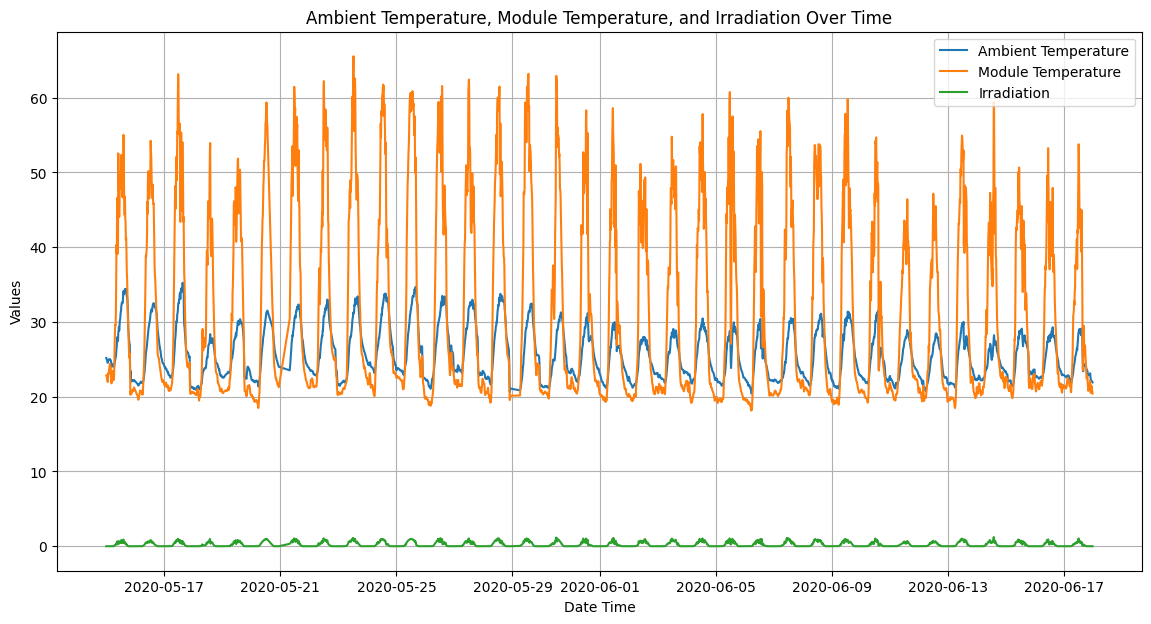

In [64]:
# Plot AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, and IRRADIATION over time
plt.figure(figsize=(14, 7))

plt.plot(df['DATE_TIME'], df['AMBIENT_TEMPERATURE'], label='Ambient Temperature')
plt.plot(df['DATE_TIME'], df['MODULE_TEMPERATURE'], label='Module Temperature')
plt.plot(df['DATE_TIME'], df['IRRADIATION'], label='Irradiation')

plt.xlabel('Date Time')
plt.ylabel('Values')
plt.title('Ambient Temperature, Module Temperature, and Irradiation Over Time')
plt.legend()
plt.grid(True)
plt.show()